### Import packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

### Gegevens inlezen

In [2]:
data = pd.read_csv('ExploritoryData.csv')

### Toon de eerste paar rijen van de dataset

In [3]:
print("Eerste 5 rijen van de dataset:")
print(data.head())

Eerste 5 rijen van de dataset:
                        naam   prijs               categorie  \
0   Mobility INDOOR Rollator  199.00          Loophulpmiddel   
1     Interactieve Robot Kat  124.00                   Robot   
2  Slide slim gordijnsysteem  299.00          Automatisering   
3            Tessa zorgrobot  640.00                   Robot   
4        Assist Alarmhorloge  224.95  Dwaal- en valpreventie   

                      probleem  rating  
0                 Valpreventie       5  
1   Activiteiten en stimulatie       5  
2       Veiligheid en toezicht       5  
3  Verwarring en desoriëntatie       5  
4                 Valpreventie       5  


### Bekijk de algemene informatie over de dataset

In [4]:
print("\nAlgemene informatie over de dataset:")
print(data.info())


Algemene informatie over de dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   naam       87 non-null     object 
 1   prijs      87 non-null     float64
 2   categorie  87 non-null     object 
 3   probleem   87 non-null     object 
 4   rating     87 non-null     int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 3.5+ KB
None


### Statistische samenvatting van numerieke kolommen

In [6]:
print("\nStatistische samenvatting van numerieke kolommen:")
print(data.describe())


Statistische samenvatting van numerieke kolommen:
             prijs     rating
count    87.000000  87.000000
mean    307.801379   4.172414
std     532.745763   1.133085
min      16.950000   1.000000
25%      49.990000   4.000000
50%     129.000000   5.000000
75%     209.950000   5.000000
max    2395.800000   5.000000


### Unieke waarden in de 'categorie' kolom


In [7]:
print("\nUnieke waarden in de 'categorie' kolom:")
print(data['categorie'].unique())


Unieke waarden in de 'categorie' kolom:
['Loophulpmiddel' 'Robot' 'Automatisering' 'Dwaal- en valpreventie'
 'Medicijnen' 'Alarm' 'Mobiliteit' 'Badkamer' 'Communicatie' 'Gezondheid'
 'Veiligheid' 'Keuken' 'Tracking']


### Gemiddelde prijs van producten

In [8]:
gemiddelde_prijs = data['prijs'].mean()
print(f"\nGemiddelde prijs van producten: {gemiddelde_prijs:.2f} Euro")


Gemiddelde prijs van producten: 307.80 Euro


### plotten van verschillende relaties binnen de data


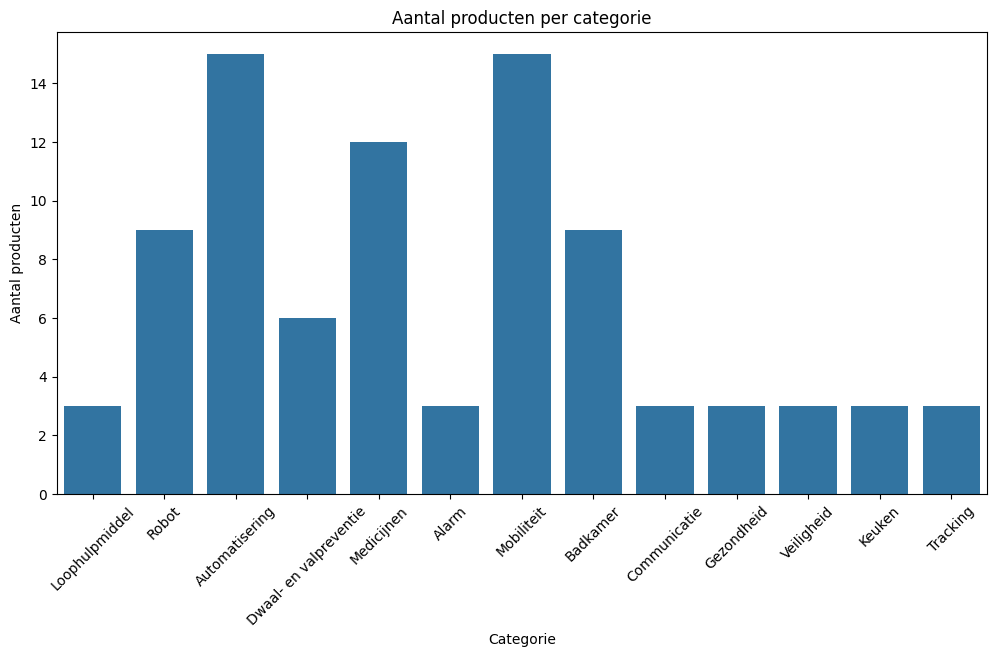

In [9]:
plt.figure(figsize=(12, 6))
sns.countplot(x='categorie', data=data,)
plt.title('Aantal producten per categorie')
plt.xlabel('Categorie')
plt.ylabel('Aantal producten')
plt.xticks(rotation=45)
plt.show()

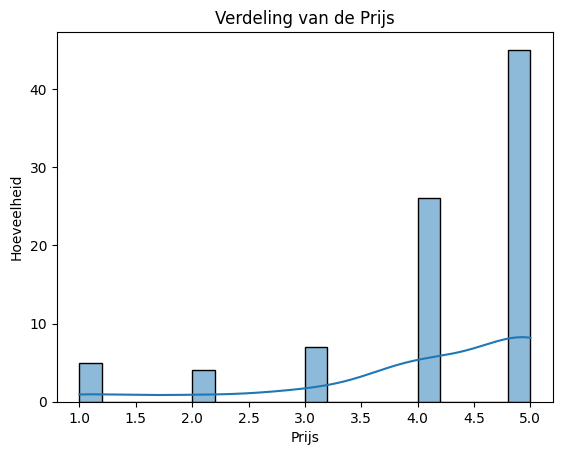

In [10]:
sns.histplot(data['rating'], bins=20, kde=True)
plt.title('Verdeling van de Prijs')
plt.xlabel('Prijs')
plt.ylabel('Hoeveelheid')
plt.show()

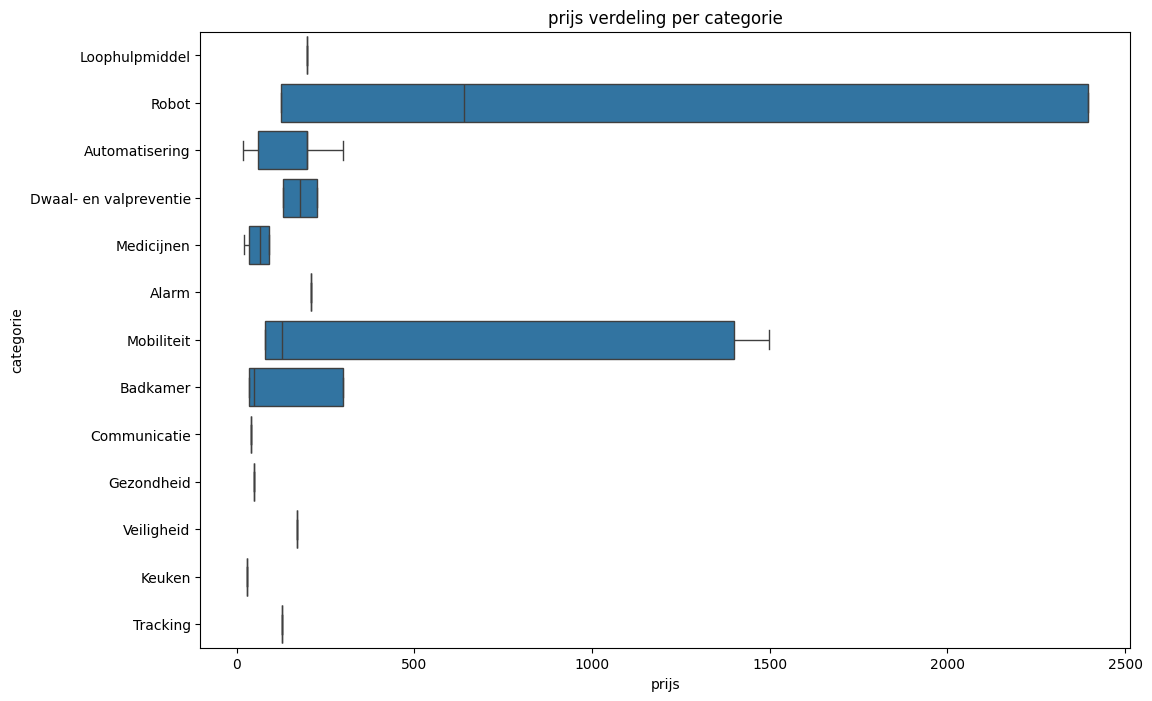

In [32]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='prijs', y='categorie', data=data)
plt.title('prijs verdeling per categorie')
plt.xlabel('prijs')
plt.ylabel('categorie')
plt.show()

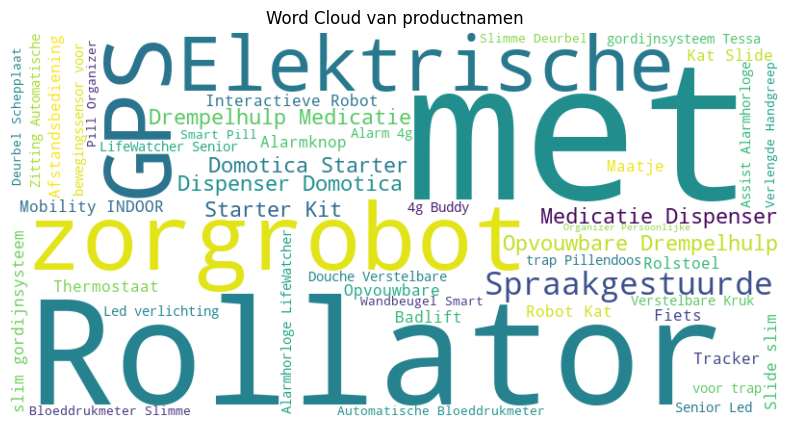

In [12]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(data['naam']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud van productnamen')
plt.show()


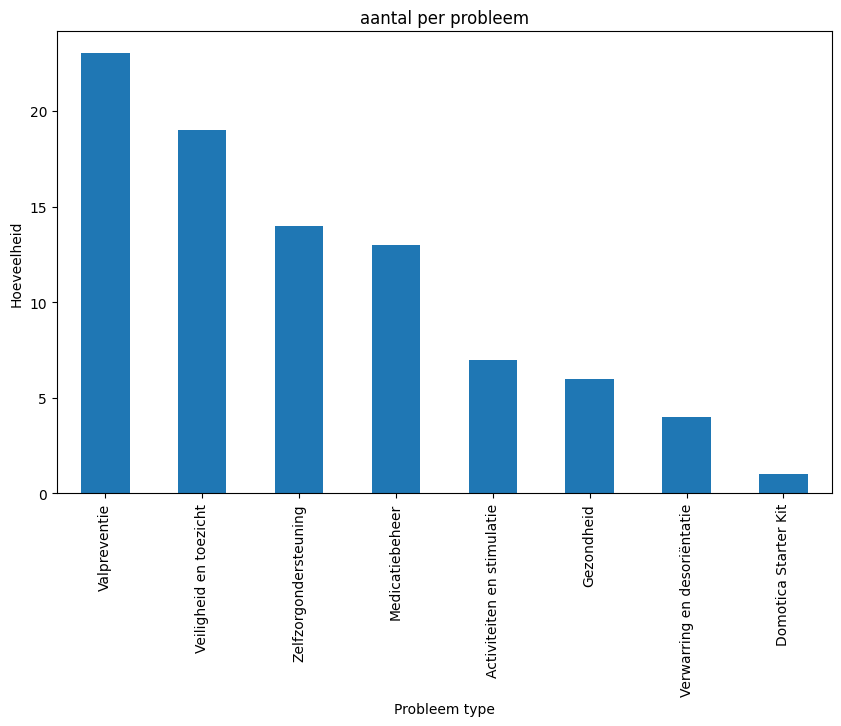

In [16]:
plt.figure(figsize=(10, 6))
data['probleem'].value_counts().plot(kind='bar')
plt.title('aantal per probleem')
plt.xlabel('Probleem type')
plt.ylabel('Hoeveelheid')
plt.show()

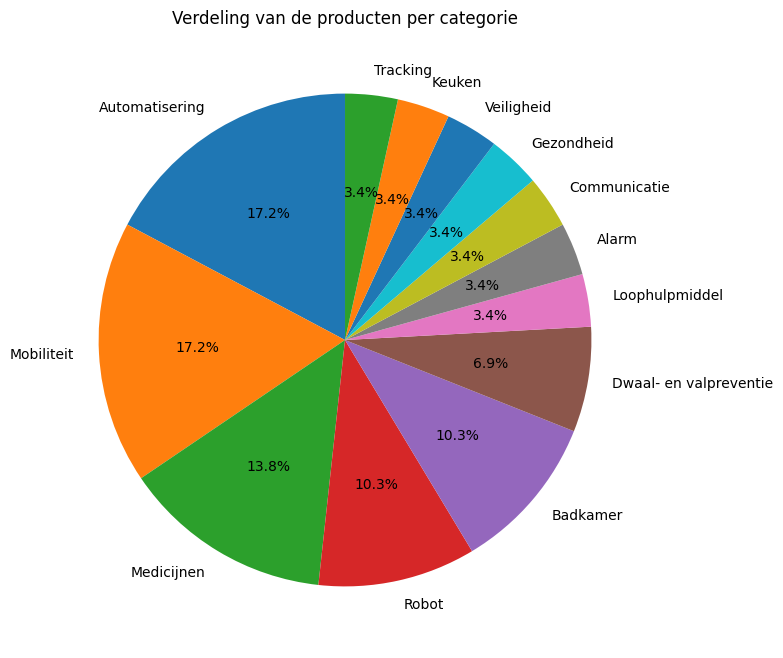

In [13]:
plt.figure(figsize=(8, 8))
data['categorie'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Verdeling van de producten per categorie')
plt.ylabel('')
plt.show()


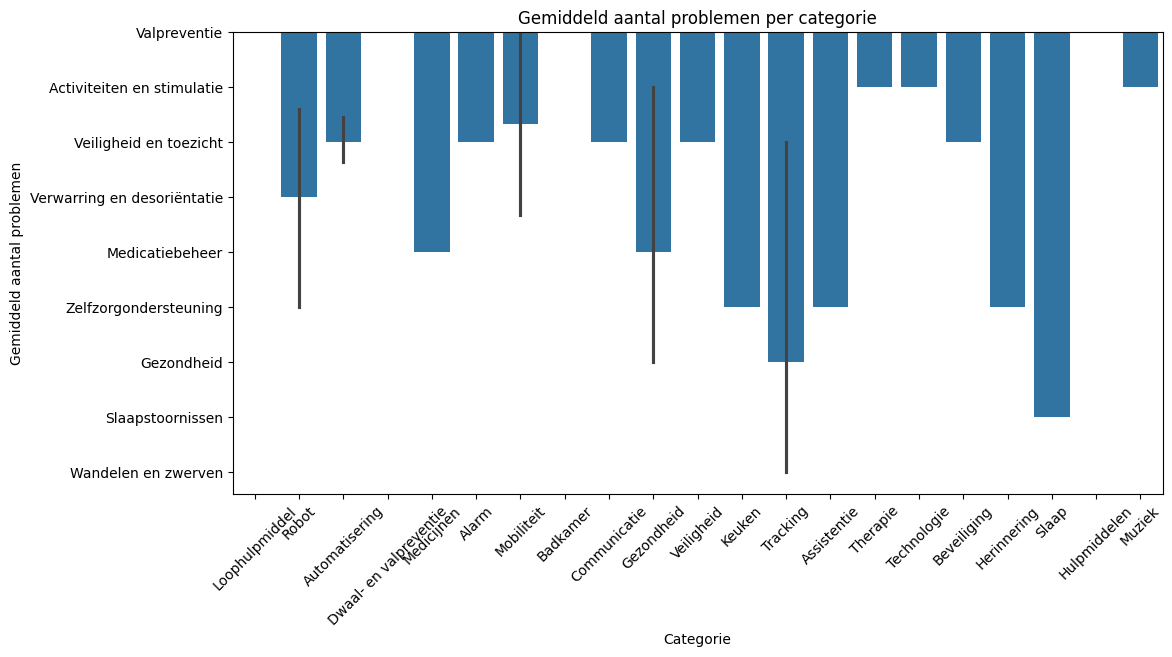

In [98]:
plt.figure(figsize=(12, 6))
sns.barplot(x='categorie', y='probleem', data=data)
plt.title('Gemiddeld aantal problemen per categorie')
plt.xlabel('Categorie')
plt.ylabel('Gemiddeld aantal problemen')
plt.xticks(rotation=45)
plt.show()



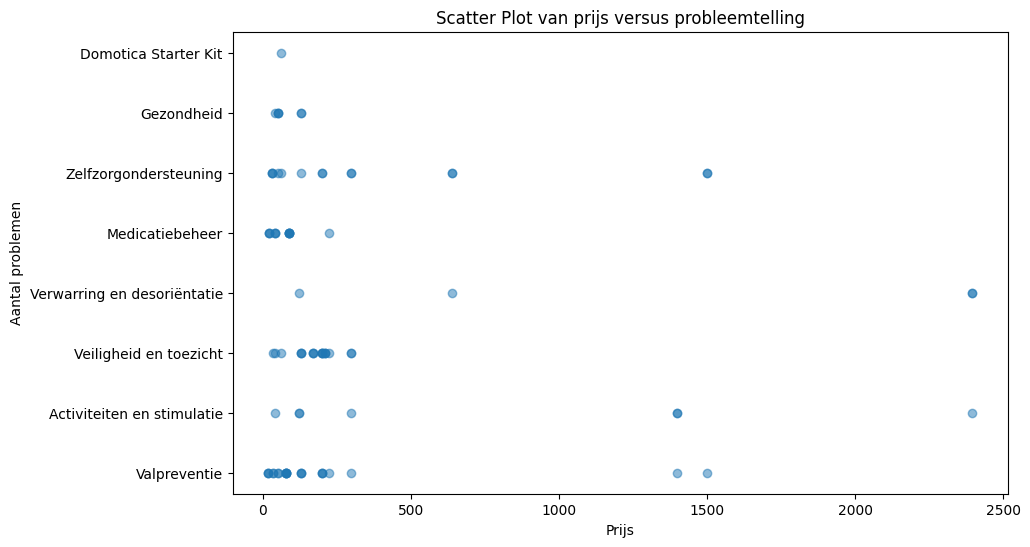

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(data['prijs'], data['probleem'], alpha=0.5)
plt.title('Scatter Plot van prijs versus probleemtelling')
plt.xlabel('Prijs')
plt.ylabel('Aantal problemen')
plt.show()


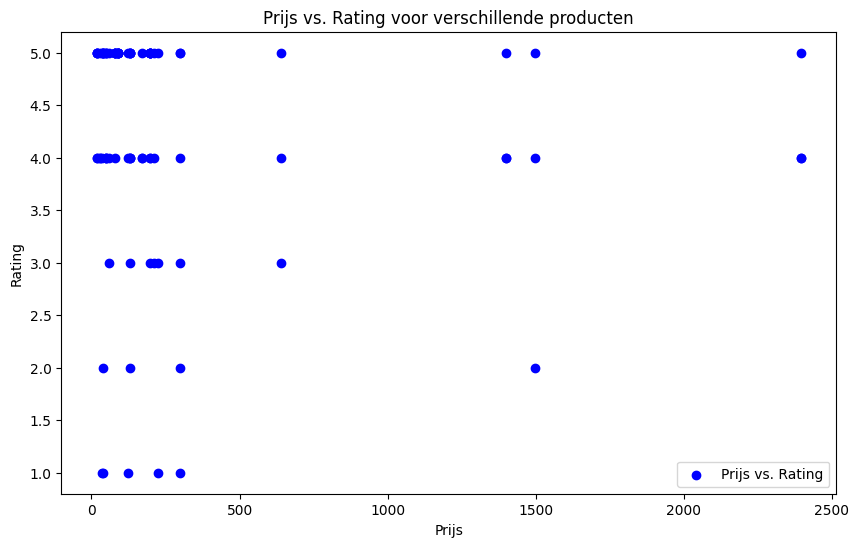

In [19]:
# Plot
plt.figure(figsize=(10, 6))
plt.scatter(data['prijs'], data['rating'], color='blue', label='Prijs vs. Rating')
plt.xlabel('Prijs')
plt.ylabel('Rating')
plt.title('Prijs vs. Rating voor verschillende producten')
plt.legend()
plt.show()


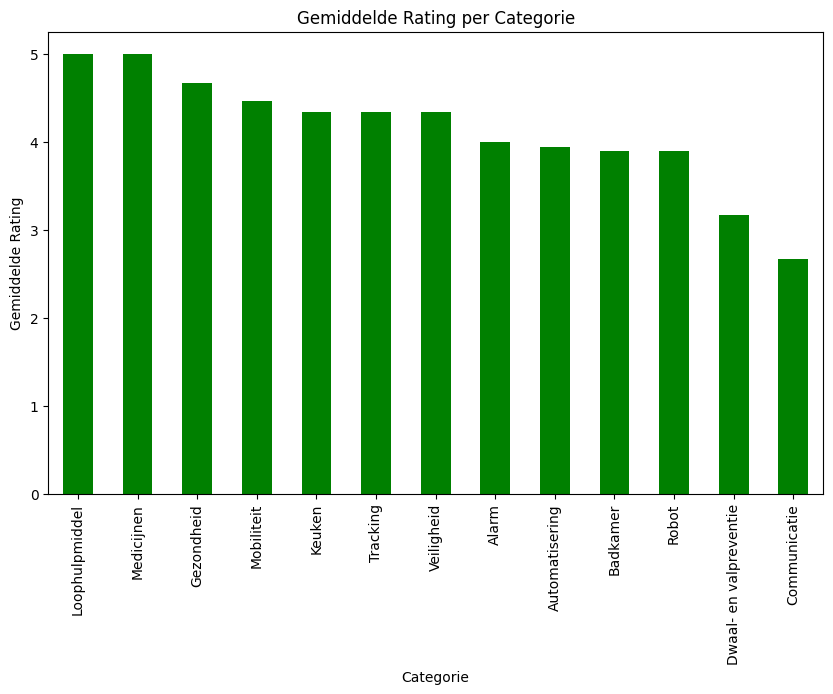

In [20]:
# Bereken de gemiddelde rating per categorie
avg_rating_per_category = data.groupby('categorie')['rating'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
avg_rating_per_category.plot(kind='bar', color='green')
plt.xlabel('Categorie')
plt.ylabel('Gemiddelde Rating')
plt.title('Gemiddelde Rating per Categorie')
plt.show()

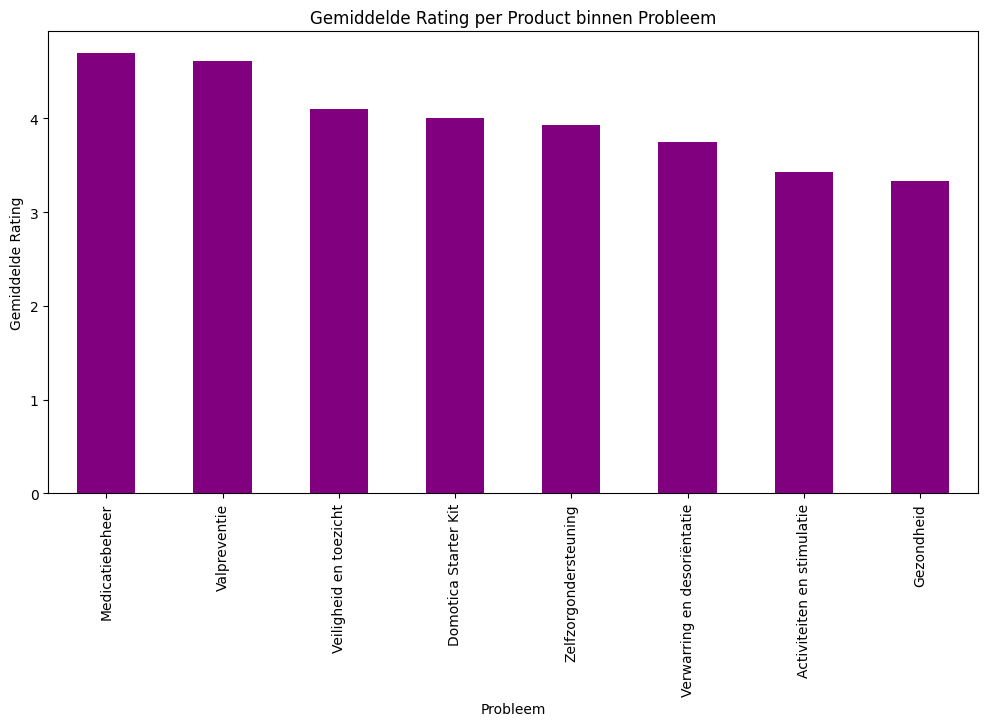

In [27]:
# Bereken het gemiddelde van de rating per probleem
avg_rating_per_problem = data.groupby('probleem')['rating'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
avg_rating_per_problem.plot(kind='bar', color='purple')
plt.xlabel('Probleem')
plt.ylabel('Gemiddelde Rating')
plt.title('Gemiddelde Rating per Product binnen Probleem')
plt.show()

/var/folders/qx/p04q2jtd7qbg9wlzpdr33cz80000gn/T/ipykernel_81747/4246781990.py:10: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  colorbar = plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'))


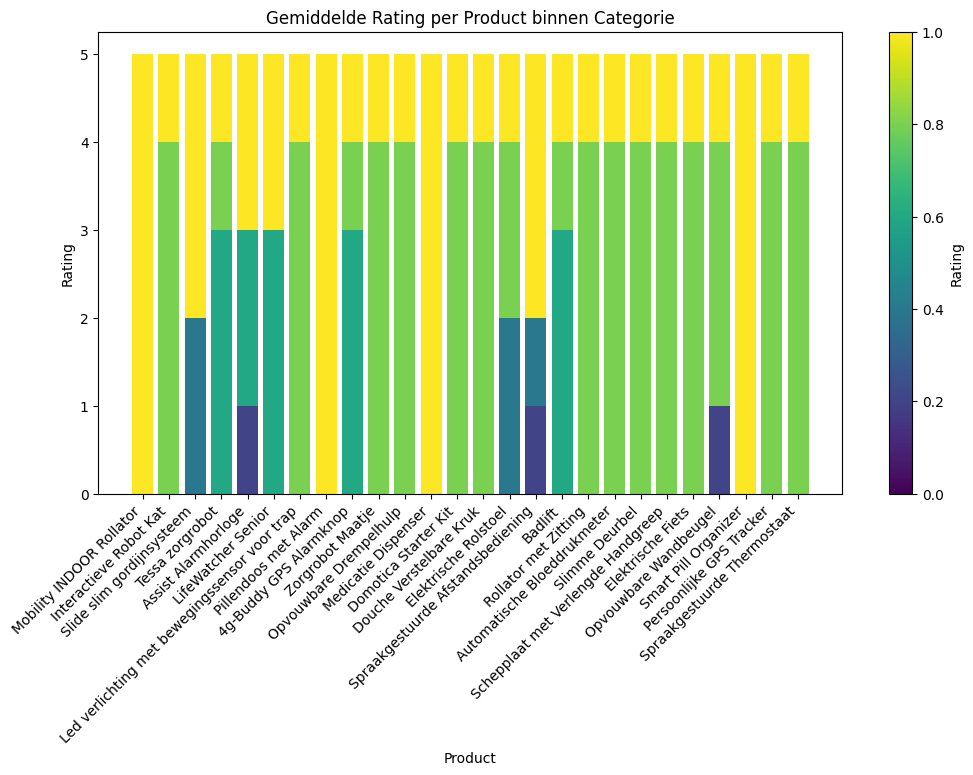

In [28]:
# Plot
plt.figure(figsize=(12, 6))
colors = plt.cm.viridis(data['rating'] / data['rating'].max())  # Kleuren op basis van rating
bar_plot = plt.bar(data['naam'], data['rating'], color=colors)
plt.xlabel('Product')
plt.ylabel('Rating')
plt.title('Gemiddelde Rating per Product binnen Categorie')

# Voeg kleurenbalk toe
colorbar = plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'))
colorbar.set_label('Rating')

plt.xticks(rotation=45, ha='right')
plt.show()


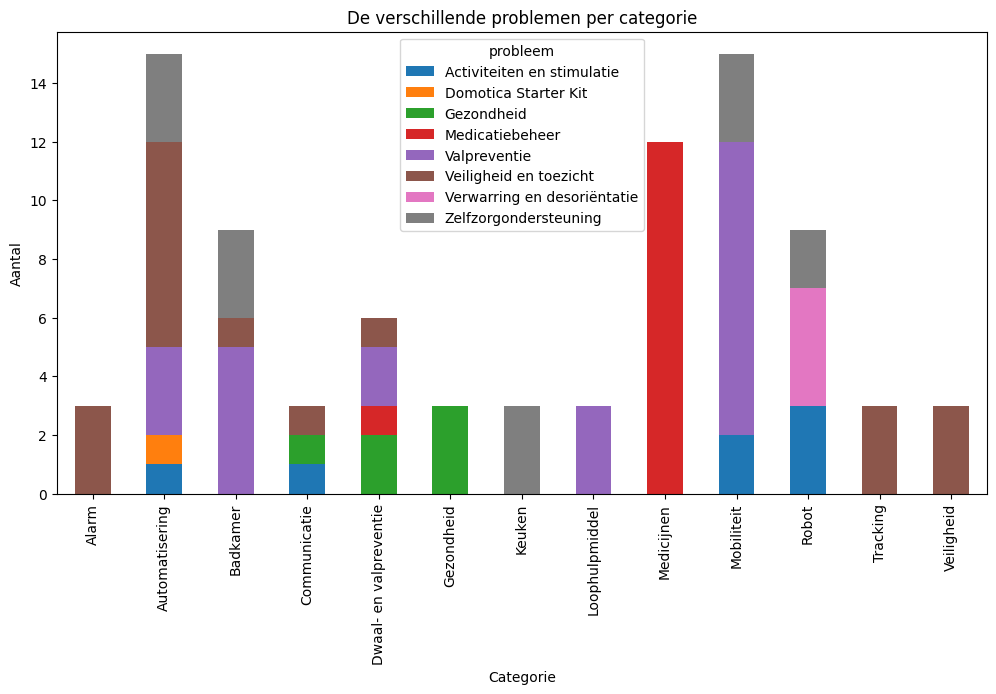

In [29]:
problem_counts = data.groupby('categorie')['probleem'].value_counts().unstack().fillna(0)
problem_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('De verschillende problemen per categorie')
plt.xlabel('Categorie')
plt.ylabel('Aantal')
plt.xticks(rotation=90)
plt.show()
